# **Linear Time Invariant (LTI) systems**

Reference library used in this topic: https://python-control.readthedocs.io/en/latest/optimal.html


* A general nonlinear system can be modeled using a set of differential equations as given below.

\begin{equation} \begin{array}{c} 
\dot{\mathbf{x}} = f(\mathbf{x},\mathbf{u},\mathbf{w})\\ 
\mathbf{y} = g(\mathbf{x},\boldsymbol{\nu})
\end{array}\end{equation}

* In this general model $\mathbf{x}$ denotes the **state** vector, $\mathbf{y}$ denotes the measurement vector, $\mathbf{u}$ denotes the inputs to the system, $\mathbf{w}$ denotes the **process noise**, and $\boldsymbol{\nu}$ denotes the **measurement noise**. The nonlinear functions $\bf f$ and $\bf g$ are the process and measurement models respectively.

* This is a **stochastic system** as the noise variables introduce uncertainty to the model. When the noise variables are removed, this system can be identified as a **deterministic system**. 

* If the system is modeled using linear ordinary differential equations with non time varying coefficients, more generally if the system satisfies the principal of superposition, then the system is a linear time invariant (LTI) system. In which case the model simplifies to a vector matrix equation with constant matrices $A,B,$ and $C$.

\begin{equation} \begin{array}{c} 
\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} \\ 
\mathbf{y} = C\mathbf{x}
\end{array}\end{equation}


* The **state** of a dynamic system is the smallest set of variables such that the knowledge of these variables at time $t = t_0$ and the knowledge of the inputs $t \geq t_0$ completely determines the behavior of the system $\forall t \geq t_0$. State space representation for a given system is not unique, but always posses the same number of state variables.



# **Stability**

* **Asymptotic stability**: An LTI system is asymptotically stable if for an impulse input the the output decays to zero. 

* From classical control theory poles of a system are the roots of the characteristic equation of an LTI system, i.e., the **poles** are the roots of the denominator polynomial of a transfer function. In state space representation the poles are same as the Eigen values of matrix $A$.

* A system is asymptotically stable if all poles are located in the right half of the s plane (complex plane with imaginary and real axis), i.e., $real(Eig(A))<0$

* The system is critically stable if there are distinct poles on the imaginary axis. , i.e., $\exists!~ Eig(A) ~s.t. ~ real(Eig(A))=0$

* If there are multiple similar poles on the imaginary axis or poles on the right hand side of the $s$ plane the system is unstable. Hence the right half of the s plane is the stable zone for poles of a continous LTI system.

* Similarly, for discrete systems, the stable zone is within a unit circle defined in the s plane.


### **Example 2.5**

Consider the LTI state space model defined by the $A,B,C$ matrices below. The state vector is defined as $\mathbf{x}=[p~ v ~b_a]^T$ where $p$ denotes the position, $v$ denotes velocity, and $b_a$ denotes a bias term. Comment on the stability of the system.

In [ ]:
%%capture
!pip install control
#!pip install underactuated
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from IPython.display import clear_output
# The state space model
A= np.array([[0, 1, 0],[0, 0, -1],[0, 0, 0]])
B= np.array([[0], [1], [0]]);
C= np.eye(3);
D= np.array([[0], [0],[0]]);

<LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.  1.  0.]
     [ 0.  0. -1.]
     [ 0.  0.  0.]]

B = [[0.]
     [1.]
     [0.]]

C = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]

D = [[0.]
     [0.]
     [0.]]

[0.+0.j 0.+0.j 0.+0.j]


Text(0.5, 1.0, 'state b_a')

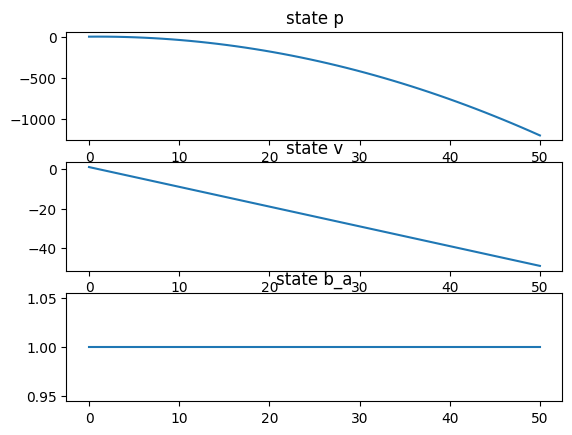

In [ ]:
sys =ct.ss(A,B,C,D)
print(sys)
print(ct.pole(sys))
T, yout =ct.initial_response(sys,np.linspace(0.0, 50.0, num=50),1)

fig, axs = plt.subplots(3, 1)
axs[0].plot(T,yout[0]);
axs[1].plot(T,yout[1]);
axs[2].plot(T,yout[2]);
axs[0].set_title('state p')
axs[1].set_title('state v')
axs[2].set_title('state b_a')

* As shown above the system is unstable. i.e. repeated poles on imaginary axis cause instabilty. Looking at the arbitrary initial condition response indicates that states p and v diverge (unstable) while $b_a$ remains constant (marginally stable).

## **Discretize LTI models**



*   The continous system model can be discretized to give the following form. This form is advantageous when numericaly implementing a controller for the system using digital processors.

$$\mathbf{x}_{k+1}=A_k\mathbf{x}_{k}+B_k\mathbf{u}_{k} \\
\mathbf{y}_{k}=C_k\mathbf{x}_{k}$$
*   A continous LTI model in statespace can be converted to a discrete form using the following procedure. Variable $T$ is the sampling time of the discrete implementation.
$$A^*=\begin{pmatrix}A & B \\ 0 & 0\end{pmatrix} \\
\begin{pmatrix}A_k & B_k \\ 0 & I\end{pmatrix} = e^{A^*T}\\
e^{A^*T}=I+AT+\frac{1}{2!}A^2T^2+\frac{1}{3!}A^3T^3+...\\
C_k =C$$

* Some control algorithms prefer this discrete representation when desiging and analysing  controllers. So the conversion will become useful in several cases you come across in this course.

* For the discrete model $A_k$ the criteria for stability is differnet. For discrete systems, we check the eigen values of $A_k$. 

* A discrete system is asymptotically stable if all poles are located inside the unit circle of the s plane (complex plane with imaginary and real axis), i.e., $||Eig(A)||<1$

* The discrete system is critically stable if there are distinct poles on the perimeter of the unit circle defined in the $s$ plane. , i.e., $\exists!~ Eig(A_k) ~s.t. ~ ||Eig(A)||=1$

* If there are multiple similar poles on the unit circle or poles outside the unit circle of the $s$ plane the system is unstable. Hence within the unit circle of the s plane is the stable zone for poles of a discrete LTI system.




## **Example 2.6**
Express the model given in the previous Example 5 as a discrete model of the form:
$$\mathbf{x}_{k+1}=A_k\mathbf{x}_{k}+B_k\mathbf{u}_{k} \\
\mathbf{y}_{k}=C_k\mathbf{x}_{k}.$$
Use a sampling time of $dt=0.001$ for discretization. Comment on the stability of the model with no inputs.

In [ ]:
from scipy.linalg import expm
from scipy.linalg import eigvals
# parameters
dt = 0.001

# convert the model to discrete
Phi = expm(np.block([[A, B], [np.zeros([B.shape[1],A.shape[1]+B.shape[1]])]])*dt)
Ak  = Phi[0:A.shape[0],0:A.shape[1]]
Bk  = Phi[0:A.shape[1],A.shape[1]:A.shape[1]+B.shape[0]]

print("Ak",Ak)
print("Bk",Bk)
print("Ck",C)
print(eigvals(Ak))

Ak [[ 1.e+00  1.e-03 -5.e-07]
 [ 0.e+00  1.e+00 -1.e-03]
 [ 0.e+00  0.e+00  1.e+00]]
Bk [[5.e-07]
 [1.e-03]
 [0.e+00]]
Ck [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1.+0.j 1.+0.j 1.+0.j]


There are repeated poles on the unit circle implying instability similar to the continous case.

#  **Controllability and stabilizability**

* A system is said to be **controllable** at time $t_0$ if it is possible to apply an unconstrained input vector to transfer the system from the initial state $x(t_0)$ to a desired state in a finite interval of time. The necessary and sufficient conditions for controllability of a system is that the controllability matrix should be of rank $n$, where $n$ is the number of states.

* The column vectors of the controllability matrix spans the controllable space of the system, i.e, indicates the controllable directions (**controllable modes**) of a system.

* The **right null space** is defined as the vectors $\mathbf{x}$ that satisfy $\forall \mathbf{x}\neq 0 ~s.t.~ \mathbf{x}^TA=\mathbf{0}$.

* The right null space of the controllability matrix indicates the directions  which are uncontrollable (**uncontrollable modes**). 

* If all eigen values of a system have negative real part then the system is stable, i.e., all modes are stable. For a system to be **stabilizable**, any unstable mode of the system should be controllable and uncontrollable modes of the system should be stable.



## **Example 2.7**

Comment on the stability and stabilizability of the system you studied in the previous example 5.

In [ ]:
#C=np.block([B, A@B, np.linalg.matrix_power(A,2)@B])
C =ct.ctrb(A,B)
print(C)

np.linalg.matrix_rank(C)


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


2

* The controllability of the system indicates that the system is controllable along two directions using the inputs. And the column space of the controllability matrix spans the directions which are controllable. i.e., $p$ and $v$ . While $b_a$  is uncontrollable.

* In the above system the uncontrollable mode is (marginally) stable. And the unstable modes $p$  and $v$  are controllable. Hence its a stabilizable system. i.e, we can relocate the poles of the unstable modes while leaving the poles of the stable modes unchanged.

* **In control we only work with systems that are controllable. More generally, we only work with systems that are stabilizable at a desired state**.

# **State Feedback controller**

* For a stabilizable system we can design a state feedback controller to drive the states to its equilibrium ($0$). State feedback controller applies an input where $u=-Kx$.

<img src="img/state_feedback_controller.png" width="350" /> 
<div style="text-align: center">![state_feedback_controller](./img/state_feedback_controller.png){width=350px}</div>

* Applying this results in an autonoumous linear system model of the form

\begin{equation} \begin{array}{c} 
\dot{\mathbf{x}} = (A - BK)\mathbf{x} \\ 
\end{array}\end{equation}

* $K$ should be selected such that the poles of $A-BK$ on the left hand side of the imaginary plane.



## **Example 2.8**

You are required to design a controller to stabilize states $p$ and $v$ of the previous example 5. Find a suitable controller gain $K$ for the controller.

In [ ]:
# We are dealing with a new system now.. we dont have to worry about b_a as it is marginally stable and uncontrollable

# The state space model
A= np.array([[0, 1],[0, 0]])
B= np.array([[0], [1]]);
C= np.eye(2);
D= np.array([[0], [0]]);

sys = ct.ss(A,B,C,D)

Kc=ct.place(A,B,[-1.+1.j, -1.-1.j])
print(Kc)
#the new autonoumous system becomes dx= (A-B*Kc)x
A_new=(A-B@Kc)

sys = ct.ss(A_new,[0,0],[1,0],0)
print(ct.poles(sys)) #checking the location of the new poles

[[2. 2.]]
[-1.+1.j -1.-1.j]


* Now if we look at the poles of the new system $\dot{\mathbf{x}} = (A - BK)\mathbf{x}$ , the poles are all at stable locations (marginally stable in the case of $b_a$ ) . And the initial condition response drives the controlled states to zero. 

(array([-1.+1.j, -1.-1.j]), array([nan+0.j, -2.+0.j]))

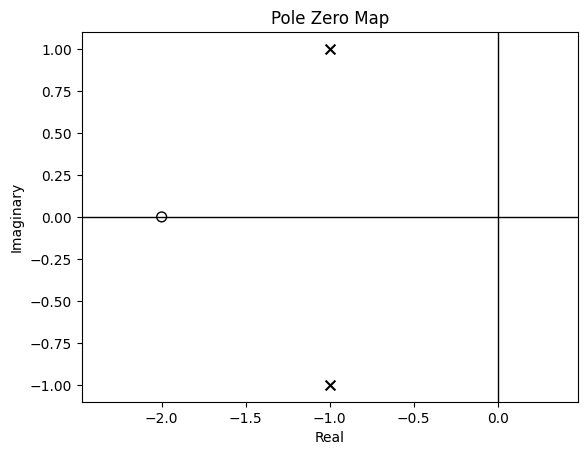

In [ ]:
ct.pzmap(sys,1)

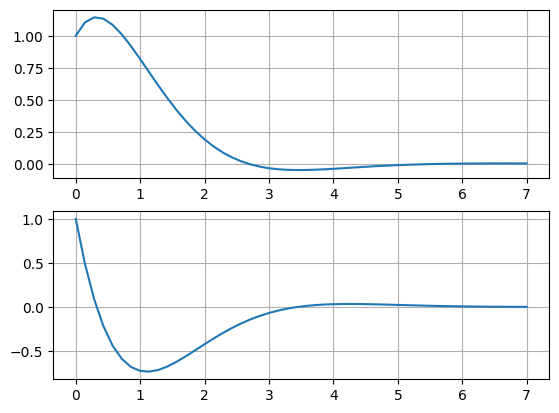

In [ ]:
sys = ct.ss(A_new,[0,0],C,D)
T, yout =ct.initial_response(sys,np.linspace(0.0, 7.0, num=50),1)
fig, axs = plt.subplots(2, 1)
axs[0].grid()
axs[0].plot(T,yout[0]);
axs[1].plot(T,yout[1]);axs[1].grid()


## **Exercise 2.4**

Consider the following LTI model and comment on
 
 \begin{equation} \begin{array}{c} 
\dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} \\ 
\mathbf{y} = C\mathbf{x}
\end{array}\end{equation}

$$A=\begin{pmatrix}5 & 2 &2\\ 1 & 1 &0 \\ 1 & 2 &0\end{pmatrix}, ~B=\begin{pmatrix}1 & 0 \\ 0 & 0 \\0 &1 \end{pmatrix},~ C = I_3 $$

 a. Controlability of the model.

 b. Stability of the system with no inputs. (stability of the A matrix)

 c.Find stabilizing gains $K$ for the system 
 
 d.Plot the resulting response of all states for an arbitrary initial condition.

## **Exercise 2.5**

Express the model given in the previous Exercise 4 as a discrete model of the form:
$$\mathbf{x}_{k+1}=A_k\mathbf{x}_{k}+B_k\mathbf{u}_{k} \\
\mathbf{y}_{k}=C_k\mathbf{x}_{k}$$
Use a samplig time of $dt=0.001$. Comment on the stability of the discrete system with no inputs.

# **LQR Control**

* Linear Quadratic Regulator (LQR) uses Q and R martices to find the state feedback gains using an optimality criteria. This makes it easier to find and tune the stabilizing gains. The following optimization problem is solved.

$$ \dot{\mathbf{x}} = A\mathbf{x} + B\mathbf{u} \\ \underset{\mathbf{u}}{\mathrm{argmin}} ~ J = \int_0^\infty \left[ \mathbf{x}^T {\bf Q}  \mathbf{x} +  \mathbf{u}^T {\bf R}  \mathbf{u} \right] dt \\ \quad {\bf Q} = {\bf Q}^T \succ {\bf 0}, {\bf R} = {\bf R}^T \succeq 0 $$

* The cost $J$ is termed the (infinite horizon) linear quadratic cost function. The $Q$ and $R$ matrices penalizes the state and input respectively for being non zero. 

* The solution for this problem is well established, and is the optimal controller for the provied linear quadratic cost function. The resulting controller is:

$$ \bf u = -Kx \\
K =R^{-1}B^{T}S$$

where $\bf S$ is the solution to the continous algebric Ricatti equation (CARE) given below:

$$0 = {\bf S} {\bf A} + {\bf A}^T
    {\bf S} - {\bf S} \bf B {\bf R}^{-1} \bf B^T {\bf S} + {\bf Q} $$

* Finding the controller can be easily performed by calling (K,S) = LinearQuadraticRegulator(A,B,Q,R) or similar using a python control package.

* These methods should be designed such that the system does not invoke nonlinearities, actuator limits for the expected error values.  A guidance module should make sure to provide a suitable reference trajectory such that the controller can track with minimal errors.

This course uses Underactuated Robotics text by Prof.Russ Tedrake. For further reading to understand derivations please refer: http://underactuated.mit.edu/lqr.html

## **Example 2.9**

Design an LQR controller to stabilize the model given in example 5 with $Q = 10*I_2$ and $R=1$. Plot the resulting tragectory of the system for an arbitrary initial condition.

[[3.16227766 4.04036574]]
[-1.06161041 -2.97875534]


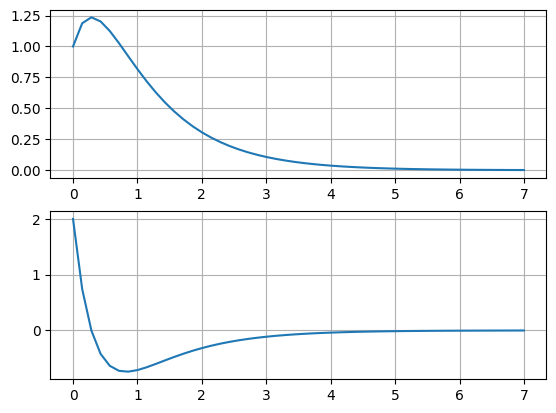

In [ ]:

# The state space model
A= np.array([[0, 1.0],[0, 0]])
B= np.array([[0], [1.0]]);
C= np.eye(2);
D= np.array([[0], [0.0]]);
Q = 10.0*np.eye(2)
#Q[1,1] = 0.0 
R =  1.*np.identity(1)

Kc, S, E = ct.lqr(A, B, Q,R)
print(Kc)
#Kc,S = LinearQuadraticRegulator(A,B,Q,R)
#print(Kc)
#the new autonoumous system becomes dx= (A-B*Kc)x
A_new=(A-B@Kc)

print(E) #checking the location of the new poles
sys = ct.ss(A_new,[0,0],C,D)
T, yout =ct.initial_response(sys,np.linspace(0.0, 7.0, num=50),[1,2])
fig, axs = plt.subplots(2, 1)
axs[0].plot(T,yout[0]);axs[0].grid()
axs[1].plot(T,yout[1]);axs[1].grid()

## **Exercise 2.6**

Design an LQR controller to stabilize the model given in exercise 4 with  Q=10∗I3  and  R=1 . Plot the resulting tragectory of the system for an arbitrary initial condition.